# Aprendizado Supervisionado II - Trabalho 3

## Pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

## Pré-Processamento

In [2]:
voice= pd.read_csv('C:\\Users\\malta\\Desktop\\Pós Graduação\\Apredizado Supervisionado II\\Atividade 3\\voice.csv', 
                  encoding='ansi')

In [30]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [31]:
voice['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [32]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [33]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [3]:
voice['label'] = voice['label'].map({'male': 1, 'female': 0})
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## Análise exploratória 

### Plots comparativos

Podemos observar que as distribuições das variáveis 'sd',  'Q25', 'IQR' e 'meanfun' nos histogramas uma menor intersecção entre as massas de dados e médias mais bem definidas para cada uma das duas categorias de voz. Para uma análise mais parcimoniosa, seria interessante tentar classificar as categorias de voz utilizando somente essas covariáveis e comparar com a classificação onde são utilizadas todas as variáveis.

C:\Users\malta\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\malta\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


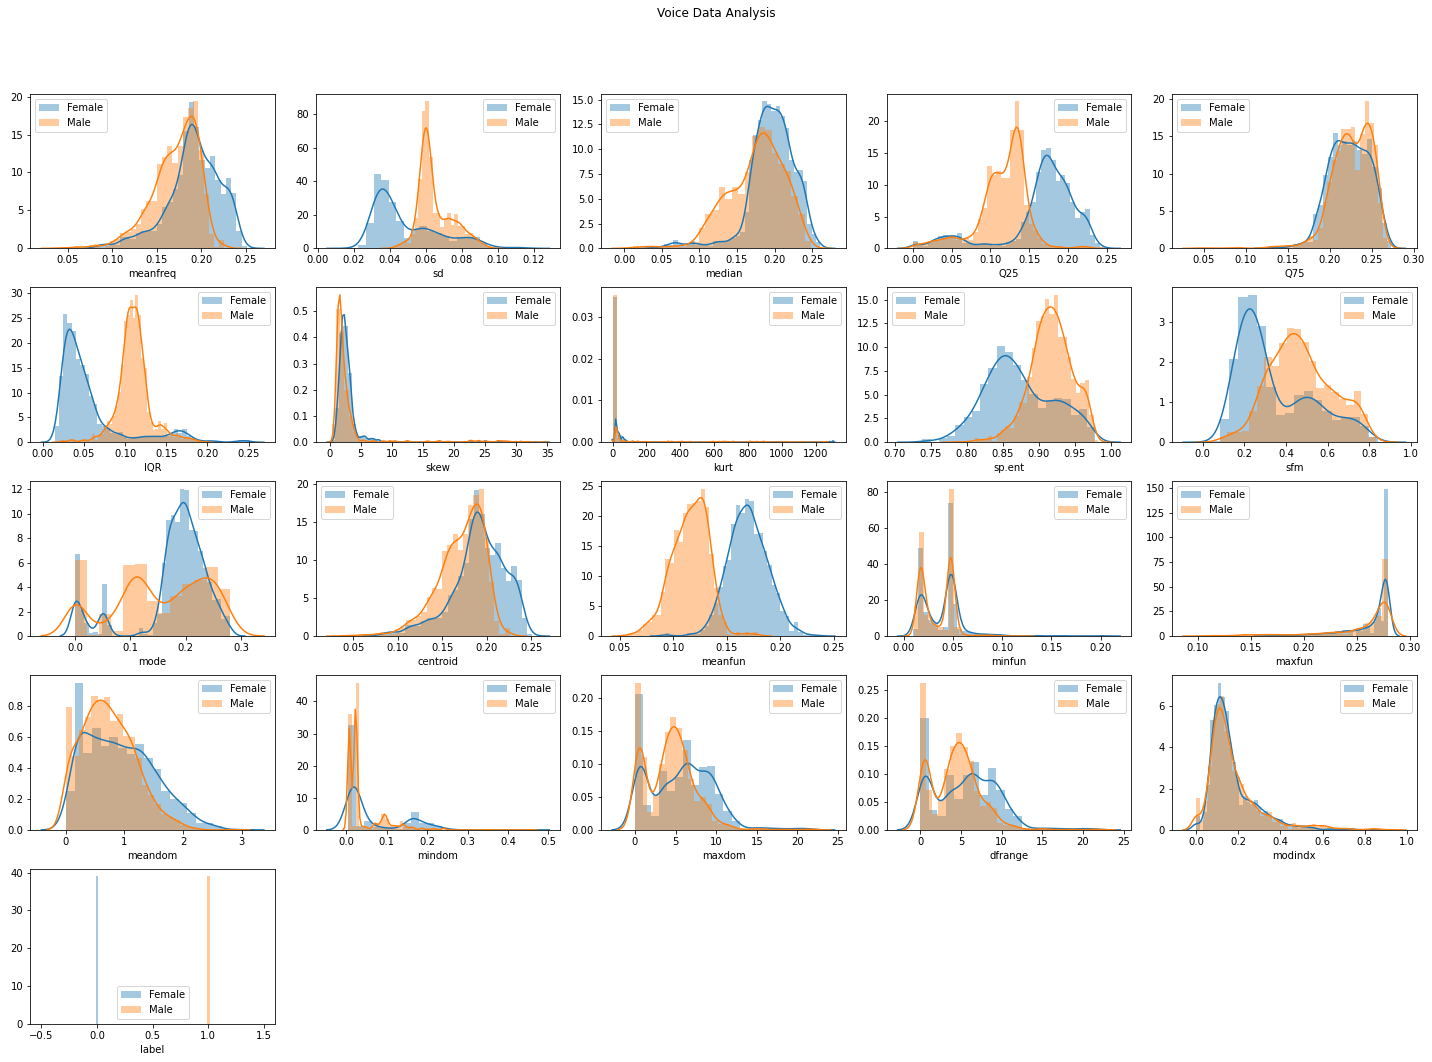

In [35]:
fig = plt.figure(figsize = (20, 15))
j = 0
for i in voice.columns:
    plt.subplot(5, 5, j+1)
    j += 1
    sns.distplot(voice[i][voice['label']==0], label = 'Female')
    sns.distplot(voice[i][voice['label']==1],  label = 'Male')
    plt.legend(loc='best')
fig.suptitle('Voice Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

C:\Users\malta\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


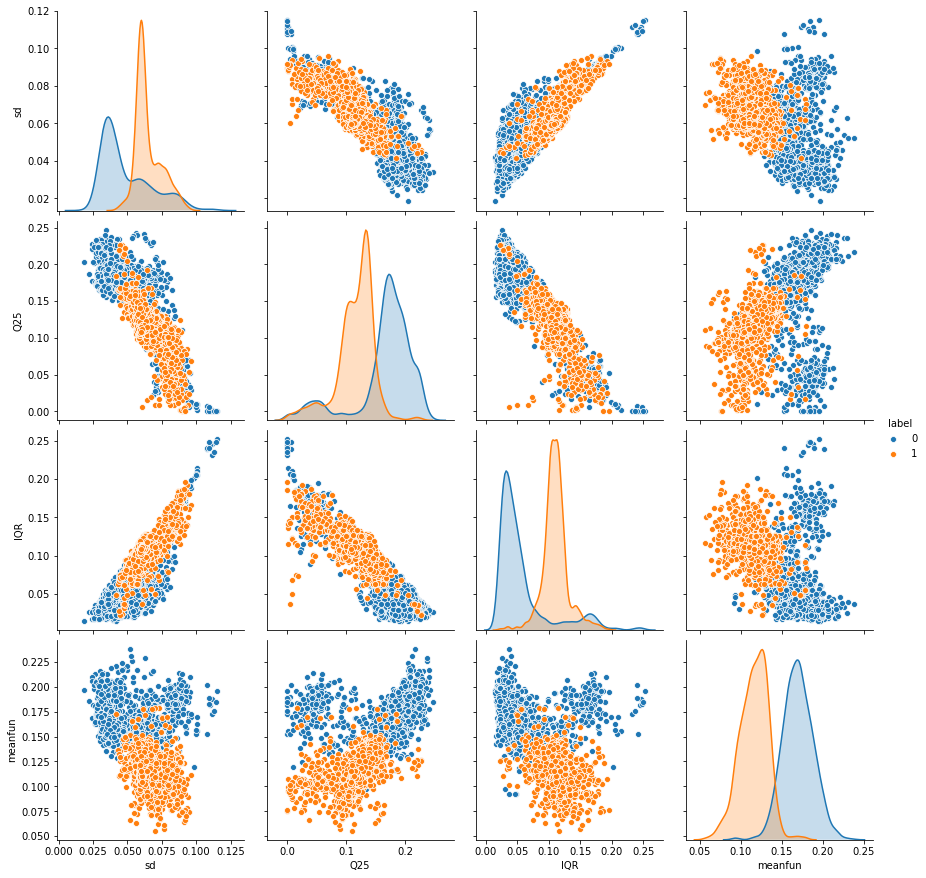

In [36]:
sns.pairplot(voice[['sd', 'Q25', 'IQR', 'meanfun', 'label']], hue = 'label', size = 3)
plt.show()

### Correlação

Se observarmos as correlações entre as variáveis, vemos que as maiores correlações (superiores em módulo à 0.5) com a variável 'label', referente às categorias que estamos interessados em avaliar, são de 'Q25', 'IQR' e 'meanfun'. Associando essa informação com a oferecida observando os histogramas, temos uma boa confiança de que pelo menos as 3 variáveis 'Q25', 'IQR' e 'meanfun' são mais importantes para a análise do que as outras.

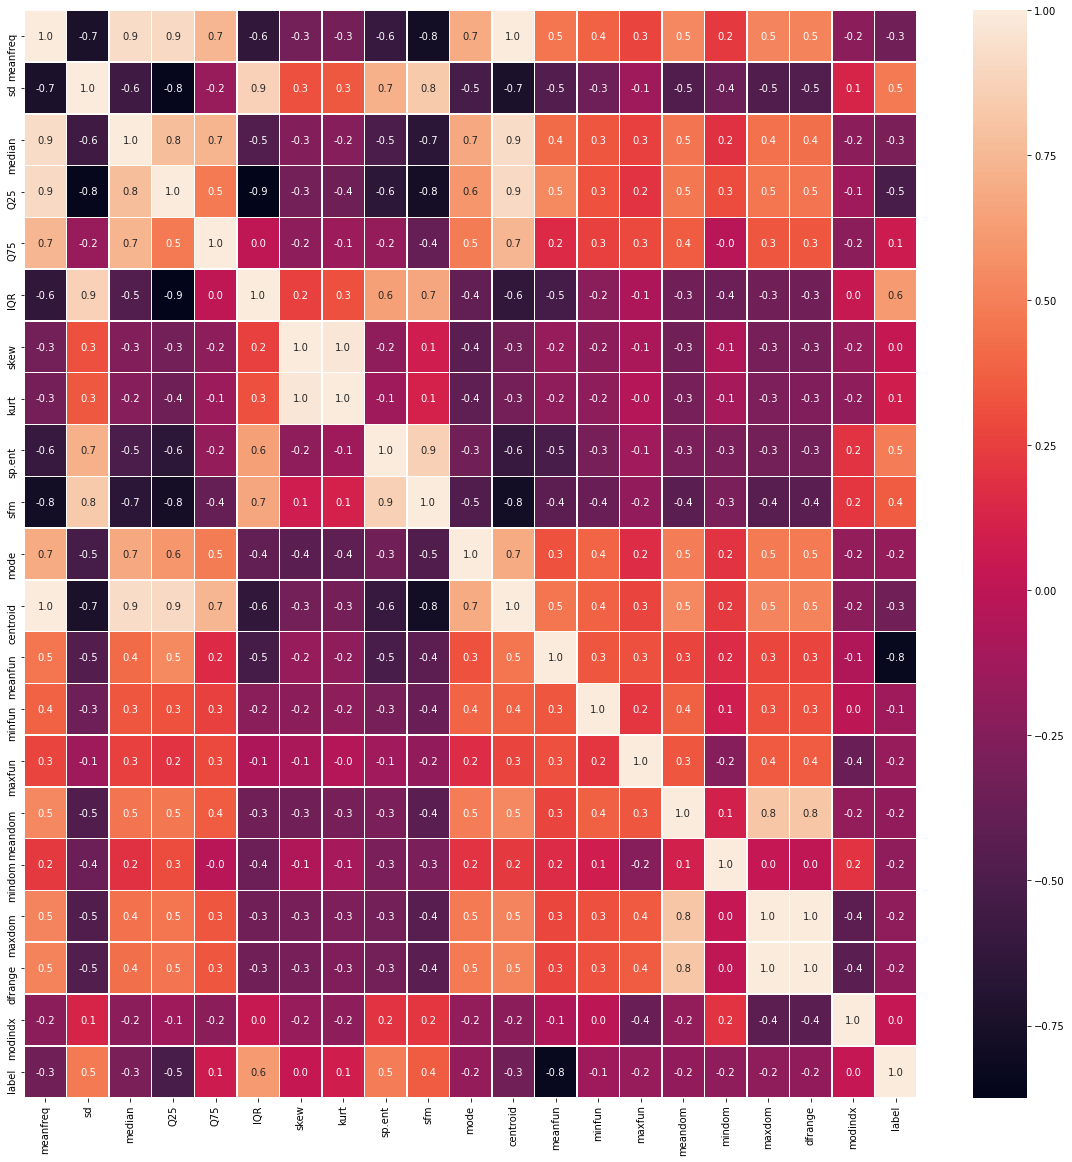

In [37]:
#Correlação
_, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(voice.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

In [38]:
voice.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [39]:
voice.corr()['label'].apply(lambda x: abs(x)).sort_values(ascending=True).iloc[1:21][::-1]

label       1.000000
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
centroid    0.337415
meanfreq    0.337415
median      0.283919
maxdom      0.195657
mindom      0.194974
dfrange     0.192213
meandom     0.191067
mode        0.171775
maxfun      0.166461
minfun      0.136692
kurt        0.087195
Q75         0.066906
skew        0.036627
Name: label, dtype: float64

## Classificadores

Foram utilizados seis classificadores nesse trabalho. Entre os classificadores paramétricos foram utilizadas três variações de Máquina de Vetor Suporte (SVM):  kernel linear, kernel radial e kernel radial com padronização escalar. Entre os classificadores não-paramétricos foram utilizados o K-nearest neighbors (KNN), Árvores de decisão e Bagging.

As 'label' foram reclassificadas como 'female' sendo '0' e 'male' sendo '1'.

As amostras foram divididas em 70% para treino e 30% para teste.

A escolha dos hiperparâmetros foi feita por meio de validação cruzada.

In [4]:
voiceCopy = voice.copy()

In [5]:
X = voiceCopy.drop(columns = ['label'])
y = voiceCopy['label']
results = []

In [6]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size = test_size)

### SVM kernel linear

Para a seleção do hiperparâmetro 'C' foi utilizada validação cruzada. Foram testados 10 hiperparâmetros em 5 grupos (5-fold cross-validation), totalizando 50 ajustes. O melhor parâmetro de regularização 'C' apontado por esse método de seleção foi 10.

Obtivemos 98% de precisão na classificação, com apenas 1% de casos em que identificamos a voz masculina como feminina (falso negativo) e 3% de casos em que identificamos a voz feminina como masculina (falso positivo).

In [43]:
param_lin = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 150, 200]}]
svm_lin_CV = GridSearchCV(SVC(kernel = 'linear'), param_grid = param_lin, cv = 5, scoring = 'accuracy', verbose = 4, n_jobs = -1)

svm_lin_CV.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 150,
                                200]}],
             scoring='accuracy', verbose=4)

In [44]:
pd.DataFrame(svm_lin_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.296474,0.006838,0.048758,0.002187,0.001,{'C': 0.001},0.680180,0.648649,0.652370,0.674944,0.638826,0.658994,0.015880,10
1,0.327482,0.023462,0.042357,0.001214,0.01,{'C': 0.01},0.725225,0.691441,0.726862,0.738149,0.686230,0.713582,0.020755,9
2,0.609625,0.057535,0.043988,0.011597,0.1,{'C': 0.1},0.808559,0.765766,0.805869,0.817156,0.794582,0.798386,0.017834,8
3,8.624275,2.994663,0.033190,0.010640,1,{'C': 1},0.921171,0.889640,0.934537,0.902935,0.911964,0.912049,0.015324,7
4,24.154216,12.481785,0.021734,0.001120,5,{'C': 5},0.961712,0.959459,0.986456,0.950339,0.961625,0.963918,0.012020,4
5,35.423240,17.892463,0.016864,0.002880,10,{'C': 10},0.961712,0.963964,0.988713,0.954853,0.966140,0.967076,0.011462,2
6,56.389656,32.868092,0.010684,0.001779,50,{'C': 50},0.963964,0.966216,0.988713,0.954853,0.972912,0.969332,0.011284,1
7,87.917853,36.577295,0.008821,0.000820,100,{'C': 100},0.961712,0.961712,0.988713,0.950339,0.968397,0.966175,0.012677,3
8,101.183024,35.306576,0.007448,0.001655,150,{'C': 150},0.959459,0.957207,0.981941,0.945824,0.970655,0.963017,0.012316,5
9,86.609086,26.222005,0.006624,0.002177,200,{'C': 200},0.959459,0.959459,0.981941,0.948081,0.966140,0.963016,0.011102,6


In [45]:
svm_lin_CV.best_estimator_

SVC(C=50, kernel='linear')

In [46]:
y_test_pred_lin_CV = svm_lin_CV.predict(X_test)

print(metrics.confusion_matrix(y_test, y_test_pred_lin_CV))
print(metrics.accuracy_score(y_test, y_test_pred_lin_CV))
print(metrics.f1_score(y_test, y_test_pred_lin_CV))

[[465  10]
 [  6 470]]
0.9831756046267087
0.9832635983263599


Score :  0.9646538191277827
SVM Kernel Linear Accuracy:  0.9810725552050473


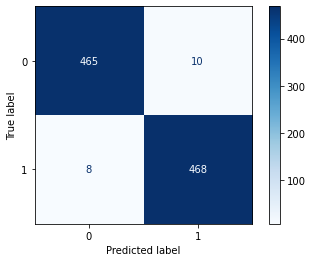

In [47]:
#SVM Kernel Linear
SVM_L = SVC(kernel = 'linear', C = 10)
SVM_L.fit(X_train, y_train)
y_pred_svm_l = SVM_L.predict(X_test)

CM = confusion_matrix(y_test, y_pred_svm_l)
acc_svm_l = accuracy_score(y_test, y_pred_svm_l)
#score = LDA.score(X_test, y_test)
score_svm_l = cross_val_score(SVM_L, X, y, cv=5) # cross-validation
results.append(acc_svm_l)

print("Score : ", score_svm_l.mean())
print("SVM Kernel Linear Accuracy: ", acc_svm_l)

plot_confusion_matrix(SVM_L, X_test, y_test, cmap= "Blues")  
plt.show()

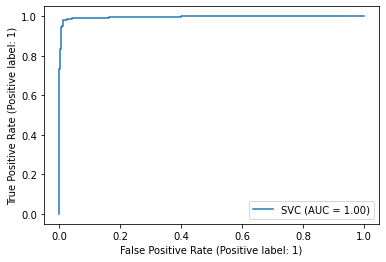

In [48]:
metrics.plot_roc_curve(SVM_L, X_test, y_test)

In [49]:
target_names = ['0','1']
print(classification_report(y_test, y_pred_svm_l, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       475
           1       0.98      0.98      0.98       476

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



### SVM kernel radial

Para a seleção dos hiperparâmetros 'C' e 'gamma' foi utilizada validação cruzada. Foram testados 13 valores diferentes para 'C' e 9 valores para 'gamma' em 5 grupos (5-fold cross-validation), totalizando 585 ajustes. O melhor parâmetro de regularização 'C' apontado por esse método de seleção foi 100000 e gamma igual a 0.0001.

Obtivemos aproximadamente 97% de precisão na classificação, com apenas 2% de casos em que identificamos a voz masculina como feminina (falso negativo) e 2% de casos em que identificamos a voz feminina como masculina (falso positivo).

In [50]:
param_rbf = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000, 5000, 10000, 50000, 100000], 
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}] # por algum motivo, com rbf é mais rápido!

svm_rbf_CV = GridSearchCV(SVC(kernel = 'rbf'), param_grid = param_rbf, cv = 5, scoring = 'accuracy', verbose = 4, n_jobs = -1)

svm_rbf_CV.fit(X_train, y_train)

Fitting 5 folds for each of 117 candidates, totalling 585 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000, 5000,
                                10000, 50000, 100000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50,
                                    100]}],
             scoring='accuracy', verbose=4)

In [51]:
pd.DataFrame(svm_rbf_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.328743,0.020775,0.198428,0.002823,0.001,0.0001,"{'C': 0.001, 'gamma': 0.0001}",0.500000,0.500000,0.498871,0.514673,0.539503,0.510609,0.015584,110
1,0.299163,0.009000,0.204956,0.004828,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.500000,0.500000,0.498871,0.618510,0.665914,0.556659,0.071445,96
2,0.323244,0.013939,0.204808,0.006480,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.500000,0.500000,0.498871,0.645598,0.645598,0.558014,0.071514,93
3,0.317763,0.002626,0.204369,0.003376,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.500000,0.500000,0.498871,0.647856,0.643341,0.558014,0.071528,93
4,0.349903,0.005926,0.217285,0.002035,0.001,1,"{'C': 0.001, 'gamma': 1}",0.500000,0.500000,0.498871,0.623025,0.638826,0.552144,0.064520,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.518118,0.034077,0.133215,0.001936,100000,1,"{'C': 100000, 'gamma': 1}",0.777027,0.740991,0.799097,0.749436,0.769752,0.767260,0.020606,31
113,0.518291,0.015332,0.219924,0.006189,100000,5,"{'C': 100000, 'gamma': 5}",0.700450,0.686937,0.720090,0.681716,0.711061,0.700051,0.014360,47
114,0.556063,0.006349,0.261156,0.014228,100000,10,"{'C': 100000, 'gamma': 10}",0.702703,0.664414,0.711061,0.679458,0.711061,0.693739,0.018678,56
115,0.638582,0.003277,0.288725,0.004455,100000,50,"{'C': 100000, 'gamma': 50}",0.623874,0.623874,0.598194,0.618510,0.625282,0.617947,0.010144,77


In [52]:
svm_rbf_CV.best_estimator_

SVC(C=100000, gamma=0.0001)

In [53]:
y_test_pred_rbf_CV = svm_rbf_CV.predict(X_test)

print(metrics.confusion_matrix(y_test, y_test_pred_rbf_CV))
print(metrics.accuracy_score(y_test, y_test_pred_rbf_CV))
print(metrics.f1_score(y_test, y_test_pred_rbf_CV))

[[459  16]
 [ 12 464]]
0.9705573080967402
0.9707112970711297


In [54]:
svm_rbf = SVC(kernel = 'rbf', gamma = 0.0001, C = 100000)
svm_rbf.fit(X_train, y_train)

y_test_pred_rbf = svm_rbf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_test_pred_rbf))
print(metrics.accuracy_score(y_test, y_test_pred_rbf))
print(metrics.f1_score(y_test, y_test_pred_rbf))

[[459  16]
 [ 12 464]]
0.9705573080967402
0.9707112970711297


Score :  0.9542377442552363
SVM Kernel Radial Accuracy:  0.9705573080967402


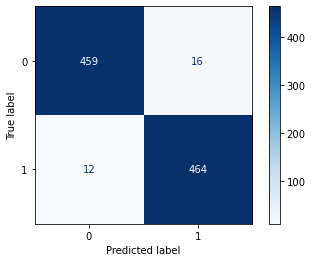

In [55]:
#SVM radial
CM = confusion_matrix(y_test, y_test_pred_rbf)
acc_svm_rbf = accuracy_score(y_test, y_test_pred_rbf)
#score = LDA.score(X_test, y_test)
score_svm_rbf = cross_val_score(svm_rbf, X, y, cv=5) # cross-validation
results.append(acc_svm_rbf)

print("Score : ", score_svm_rbf.mean())
print("SVM Kernel Radial Accuracy: ", acc_svm_rbf)

plot_confusion_matrix(svm_rbf, X_test, y_test, cmap= "Blues")  
plt.show()

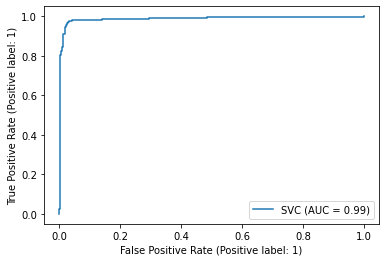

In [56]:
metrics.plot_roc_curve(svm_rbf, X_test, y_test)

In [57]:
target_names = ['0','1']
print(classification_report(y_test,y_test_pred_rbf, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       475
           1       0.97      0.97      0.97       476

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



### SVM kernel radial + StandardScaler

Para a seleção dos hiperparâmetros 'C' e 'gamma' foi utilizada validação cruzada. Foram testados 13 valores diferentes para 'C' e 8 valores para 'gamma' em 5 grupos (5-fold cross-validation), totalizando 520 ajustes. O melhor parâmetro de regularização 'C' apontado por esse método de seleção foi 10 e 'gamma' igual a 0.1.

Diferente do classificador radial apresentado anteriormente, aqui padronizamos os conjuntos de treino e teste referentes às características de interesse utilizadas para classificação.

Obtivemos aproximadamente 98% de precisão na classificação, com apenas 1% de casos em que identificamos a voz masculina como feminina (falso negativo) e 1% de casos em que identificamos a voz feminina como masculina (falso positivo).

In [58]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [59]:
param_rbf = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000, 5000, 10000, 50000, 100000], 
              'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}] # por algum motivo, com rbf é mais rápido!

svm_rbf_s_CV = GridSearchCV(SVC(kernel = 'rbf'), param_grid = param_rbf, cv = 5, scoring = 'accuracy', verbose = 4, n_jobs = -1)

svm_rbf_s_CV.fit(X_train_s, y_train)

Fitting 5 folds for each of 104 candidates, totalling 520 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000, 5000,
                                10000, 50000, 100000],
                          'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]}],
             scoring='accuracy', verbose=4)

In [60]:
pd.DataFrame(svm_rbf_s_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.307523,0.014531,0.197533,0.004619,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.500000,0.500000,0.498871,0.835214,0.778781,0.622573,0.151636,69
1,0.278556,0.003127,0.199237,0.005046,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.500000,0.500000,0.498871,0.864560,0.817156,0.636117,0.167841,67
2,0.277931,0.004205,0.194607,0.003922,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.500000,0.500000,0.498871,0.884876,0.880361,0.652822,0.187634,57
3,0.278430,0.004290,0.199654,0.005903,0.001,1,"{'C': 0.001, 'gamma': 1}",0.500000,0.500000,0.498871,0.650113,0.672686,0.564334,0.079576,71
4,0.292742,0.004300,0.195292,0.002730,0.001,5,"{'C': 0.001, 'gamma': 5}",0.500000,0.500000,0.498871,0.577878,0.607223,0.536795,0.046463,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.359808,0.050240,0.174079,0.006792,100000,1,"{'C': 100000, 'gamma': 1}",0.970721,0.972973,0.970655,0.943567,0.957111,0.963005,0.011225,32
100,0.437563,0.064570,0.210778,0.003282,100000,5,"{'C': 100000, 'gamma': 5}",0.704955,0.727477,0.749436,0.693002,0.778781,0.730730,0.030845,46
101,0.382713,0.012778,0.226699,0.005030,100000,10,"{'C': 100000, 'gamma': 10}",0.621622,0.623874,0.623025,0.627540,0.717833,0.642779,0.037578,58
102,0.584808,0.014961,0.282159,0.006304,100000,50,"{'C': 100000, 'gamma': 50}",0.500000,0.500000,0.498871,0.510158,0.505643,0.502935,0.004319,79


In [61]:
svm_rbf_s_CV.best_estimator_

SVC(C=5, gamma=0.1)

In [62]:
y_test_pred_rbf_s_CV = svm_rbf_s_CV.predict(X_test_s)

print(metrics.confusion_matrix(y_test, y_test_pred_rbf_s_CV))
print(metrics.accuracy_score(y_test, y_test_pred_rbf_s_CV))
print(metrics.f1_score(y_test, y_test_pred_rbf_s_CV))

[[467   8]
 [  9 467]]
0.982124079915878
0.982124079915878


In [63]:
svm_rbf_s = SVC(kernel = 'rbf', gamma = 0.1, C = 5)
svm_rbf_s.fit(X_train_s, y_train)

y_test_pred_rbf_s = svm_rbf_s.predict(X_test_s)

print(metrics.confusion_matrix(y_test, y_test_pred_rbf_s))
print(metrics.accuracy_score(y_test, y_test_pred_rbf_s))
print(metrics.f1_score(y_test, y_test_pred_rbf_s))

[[467   8]
 [  9 467]]
0.982124079915878
0.982124079915878


In [64]:
X_s = scaler.fit_transform(X)

Score :  0.9542302689610838
SVM Kernel Radial + StandardScaler Accuracy:  0.982124079915878


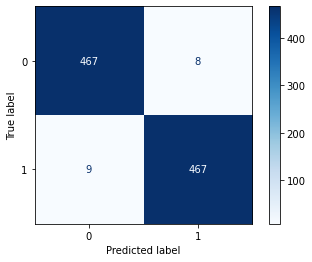

In [65]:
#SVM radial+StandardScaler
CM = confusion_matrix(y_test, y_test_pred_rbf_s)
acc_svm_rbf_s = accuracy_score(y_test, y_test_pred_rbf_s)
#score = LDA.score(X_test, y_test)
score_svm_rbf_s = cross_val_score(svm_rbf_s, X_s, y, cv=5) # cross-validation
results.append(acc_svm_rbf_s)

print("Score : ", score_svm_rbf_s.mean())
print("SVM Kernel Radial + StandardScaler Accuracy: ", acc_svm_rbf_s)

plot_confusion_matrix(svm_rbf_s, X_test_s, y_test, cmap= "Blues")  
plt.show()

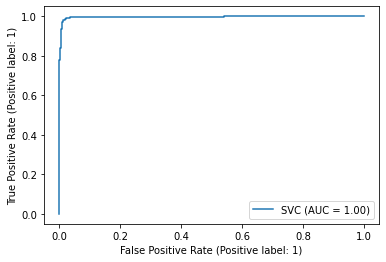

In [66]:
metrics.plot_roc_curve(svm_rbf_s, X_test_s, y_test)

In [67]:
target_names = ['0','1']
print(classification_report(y_test,y_test_pred_rbf_s, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       475
           1       0.98      0.98      0.98       476

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



### KNN

Para a seleção dos hiperparâmetros 'n_neighbors' e 'p' foi utilizada validação cruzada. Foram testados 6 valores diferentes para 'n_neighbors' e 4 valores para 'p' em 5 grupos (5-fold cross-validation), totalizando 520 ajustes. O melhor parâmetro de regularização 'n_neighbors' apontado por esse método de seleção foi 3 e 'p' igual a 1.

Obtivemos aproximadamente 77% de precisão na classificação, com 20% de casos em que identificamos a voz masculina como feminina (falso negativo) e 26% de casos em que identificamos a voz feminina como masculina (falso positivo).

In [53]:
param_KNN = [{'n_neighbors': [1, 3, 5, 10, 15, 20], 
              'p': [1, 2, 3, 4]}]

KNN_CV = GridSearchCV(KNeighborsClassifier(), param_grid = param_KNN, cv = 5, 
                      scoring = 'accuracy', verbose = 4, n_jobs = -1)

KNN_CV.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5, 10, 15, 20],
                          'p': [1, 2, 3, 4]}],
             scoring='accuracy', verbose=4)

In [54]:
pd.DataFrame(KNN_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007337,0.001666,0.070008,0.023163,1,1,"{'n_neighbors': 1, 'p': 1}",0.761261,0.792793,0.762980,0.760722,0.765237,0.768599,0.012199,5
1,0.005672,0.005907,0.138102,0.058172,1,2,"{'n_neighbors': 1, 'p': 2}",0.657658,0.729730,0.668172,0.683973,0.717833,0.691473,0.027932,13
2,0.004011,0.004912,0.961049,0.011851,1,3,"{'n_neighbors': 1, 'p': 3}",0.648649,0.691441,0.647856,0.654628,0.693002,0.667115,0.020639,23
3,0.002533,0.002168,1.162695,0.236763,1,4,"{'n_neighbors': 1, 'p': 4}",0.646396,0.691441,0.638826,0.634312,0.672686,0.656732,0.021860,24
4,0.006485,0.002013,0.055365,0.004485,3,1,"{'n_neighbors': 3, 'p': 1}",0.777027,0.788288,0.792325,0.765237,0.792325,0.783040,0.010517,1
5,0.005584,0.001017,0.062114,0.008319,3,2,"{'n_neighbors': 3, 'p': 2}",0.704955,0.713964,0.697517,0.686230,0.711061,0.702745,0.010000,9
6,0.009774,0.003535,1.316187,0.126868,3,3,"{'n_neighbors': 3, 'p': 3}",0.686937,0.675676,0.677201,0.672686,0.708804,0.684261,0.013168,17
7,0.004186,0.000399,1.235959,0.047493,3,4,"{'n_neighbors': 3, 'p': 4}",0.673423,0.666667,0.672686,0.681716,0.706546,0.680208,0.014014,21
8,0.007194,0.002766,0.075622,0.006539,5,1,"{'n_neighbors': 5, 'p': 1}",0.759009,0.786036,0.803612,0.758465,0.792325,0.779889,0.018167,2
9,0.010395,0.005540,0.067205,0.003160,5,2,"{'n_neighbors': 5, 'p': 2}",0.698198,0.709459,0.706546,0.706546,0.758465,0.715843,0.021641,7


In [55]:
KNN_CV.best_params_

{'n_neighbors': 3, 'p': 1}

In [80]:
KNN = KNeighborsClassifier(n_neighbors = 3, p = 1, n_jobs = -1)
KNN.fit(X_train, y_train)

KNN_pred = KNN.predict(X_test)

print(metrics.confusion_matrix(y_test, KNN_pred))
print('Acurácia:', metrics.accuracy_score(y_test, KNN_pred))
print('F1:', metrics.f1_score(y_test, KNN.predict(X_test)))

#plot_clf(KNN, X_train, y_train, plot_test = True, X_test = X_test, y_test = y_test)

[[358 118]
 [104 371]]
Acurácia: 0.7665615141955836
F1: 0.7697095435684647


Score :  0.7477855686954615
KNN Accuracy:  0.7760252365930599


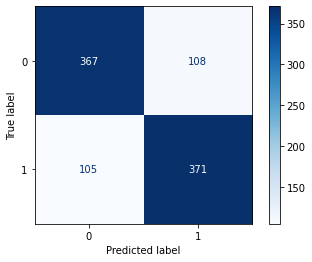

In [97]:
#lda
CM = confusion_matrix(y_test, KNN_pred)
acc_knn = accuracy_score(y_test, KNN_pred)
#score = LDA.score(X_test, y_test)
score_knn = cross_val_score(KNN, X, y, cv=5) # cross-validation
results.append(acc_knn)

print("Score : ", score_knn.mean())
print("KNN Accuracy: ", acc_knn)

plot_confusion_matrix(KNN, X_test, y_test, cmap= "Blues")  
plt.show()

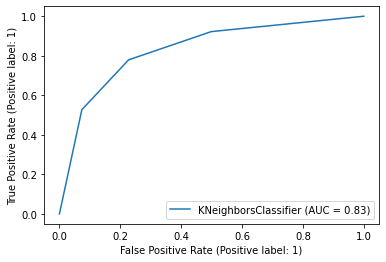

In [98]:
metrics.plot_roc_curve(KNN, X_test, y_test)

In [99]:
target_names = ['0','1']
print(classification_report(y_test,KNN_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       475
           1       0.77      0.78      0.78       476

    accuracy                           0.78       951
   macro avg       0.78      0.78      0.78       951
weighted avg       0.78      0.78      0.78       951



### Árvore de decisão

Para a seleção dos hiperparâmetros 'max_depth' e 'criterion' foi utilizada validação cruzada. Foram testados 9 valores diferentes para 'max_depth' e 2 valores para 'criterion' em 5 grupos (5-fold cross-validation), totalizando 90 ajustes. O melhor parâmetro de regularização 'max_depth' apontado por esse método de seleção foi 5 e 'criterion' igual a 'entropy'.

Obtivemos aproximadamente 97% de precisão na classificação, com 4% de casos em que identificamos a voz masculina como feminina (falso negativo) e 3% de casos em que identificamos a voz feminina como masculina (falso positivo).

In [75]:
param_DT = [{'max_depth': [1, 3, 5, 7, 10, 13, 15, 18, 20], 
             'criterion': ['gini', 'entropy']}]

DT_CV = GridSearchCV(DecisionTreeClassifier(), param_grid = param_DT, cv = 5, 
                     scoring = 'accuracy', verbose = 4, n_jobs = -1)

DT_CV.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 3, 5, 7, 10, 13, 15, 18, 20]}],
             scoring='accuracy', verbose=4)

In [76]:
pd.DataFrame(DT_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.135313,0.060833,0.003792,0.000747,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.936937,0.959459,0.957111,0.927765,0.952596,0.946774,0.012327,17
1,0.020135,0.001718,0.003006,0.002454,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.950450,0.959459,0.966140,0.957111,0.963883,0.959409,0.005493,5
2,0.031773,0.004977,0.002003,0.002454,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.941441,0.961712,0.981941,0.957111,0.966140,0.961669,0.013122,2
3,0.033609,0.005026,0.004631,0.002837,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.945946,0.950450,0.979684,0.959368,0.968397,0.960769,0.012199,4
4,0.036943,0.002954,0.003134,0.003105,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.941441,0.943694,0.975169,0.954853,0.968397,0.956711,0.013292,12
5,0.032038,0.003163,0.006755,0.002371,gini,13,"{'criterion': 'gini', 'max_depth': 13}",0.950450,0.943694,0.981941,0.950339,0.968397,0.958964,0.014121,8
6,0.037458,0.002745,0.001216,0.000993,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.948198,0.954955,0.977427,0.961625,0.963883,0.961218,0.009785,3
7,0.035871,0.003890,0.004028,0.001679,gini,18,"{'criterion': 'gini', 'max_depth': 18}",0.939189,0.948198,0.975169,0.950339,0.968397,0.956259,0.013389,14
8,0.032212,0.001920,0.005452,0.002967,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.943694,0.948198,0.979684,0.952596,0.968397,0.958514,0.013468,10
9,0.014133,0.002416,0.002911,0.002243,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.936937,0.959459,0.957111,0.927765,0.952596,0.946774,0.012327,17


In [77]:
DT_CV.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [78]:
print(metrics.confusion_matrix(y_test, DT_CV.predict(X_test)))
print(metrics.accuracy_score(y_test, DT_CV.predict(X_test)))
print(metrics.f1_score(y_test, DT_CV.predict(X_test)))

#plot_clf(DT_CV, X_train, y_train, plot_test = True, X_test = X_test, y_test = y_test)

[[464  11]
 [ 12 464]]
0.9758149316508938
0.9758149316508938


In [79]:
DT = DecisionTreeClassifier(max_depth = 5, criterion = 'gini',splitter='best')
DT.fit(X_train, y_train)

DT_pred = DT.predict(X_test)

print(metrics.confusion_matrix(y_test,DT_pred))
print(metrics.accuracy_score(y_test, DT_pred))
print(metrics.f1_score(y_test, DT_pred))

[[463  12]
 [ 14 462]]
0.9726603575184016
0.9726315789473684


Score :  0.9596005202804729
Decision Tree Accuracy:  0.9726603575184016


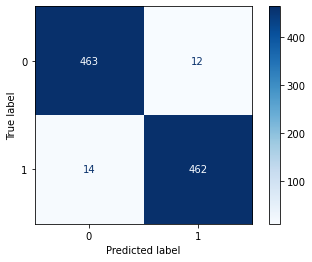

In [80]:
#Decision Tree
CM = confusion_matrix(y_test, DT_pred)
acc_dt = accuracy_score(y_test, DT_pred)
#score = LDA.score(X_test, y_test)
score_dt = cross_val_score(DT, X, y, cv=5) # cross-validation
results.append(acc_dt)

print("Score : ", score_dt.mean())
print("Decision Tree Accuracy: ", acc_dt)

plot_confusion_matrix(DT, X_test, y_test, cmap= "Blues")  
plt.show()

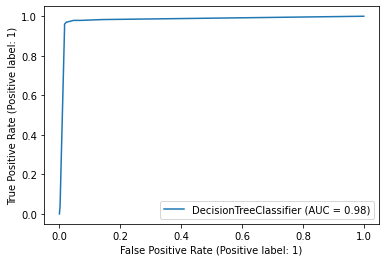

In [81]:
metrics.plot_roc_curve(DT, X_test, y_test)

In [82]:
target_names = ['0','1']
print(classification_report(y_test,DT_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       475
           1       0.97      0.97      0.97       476

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



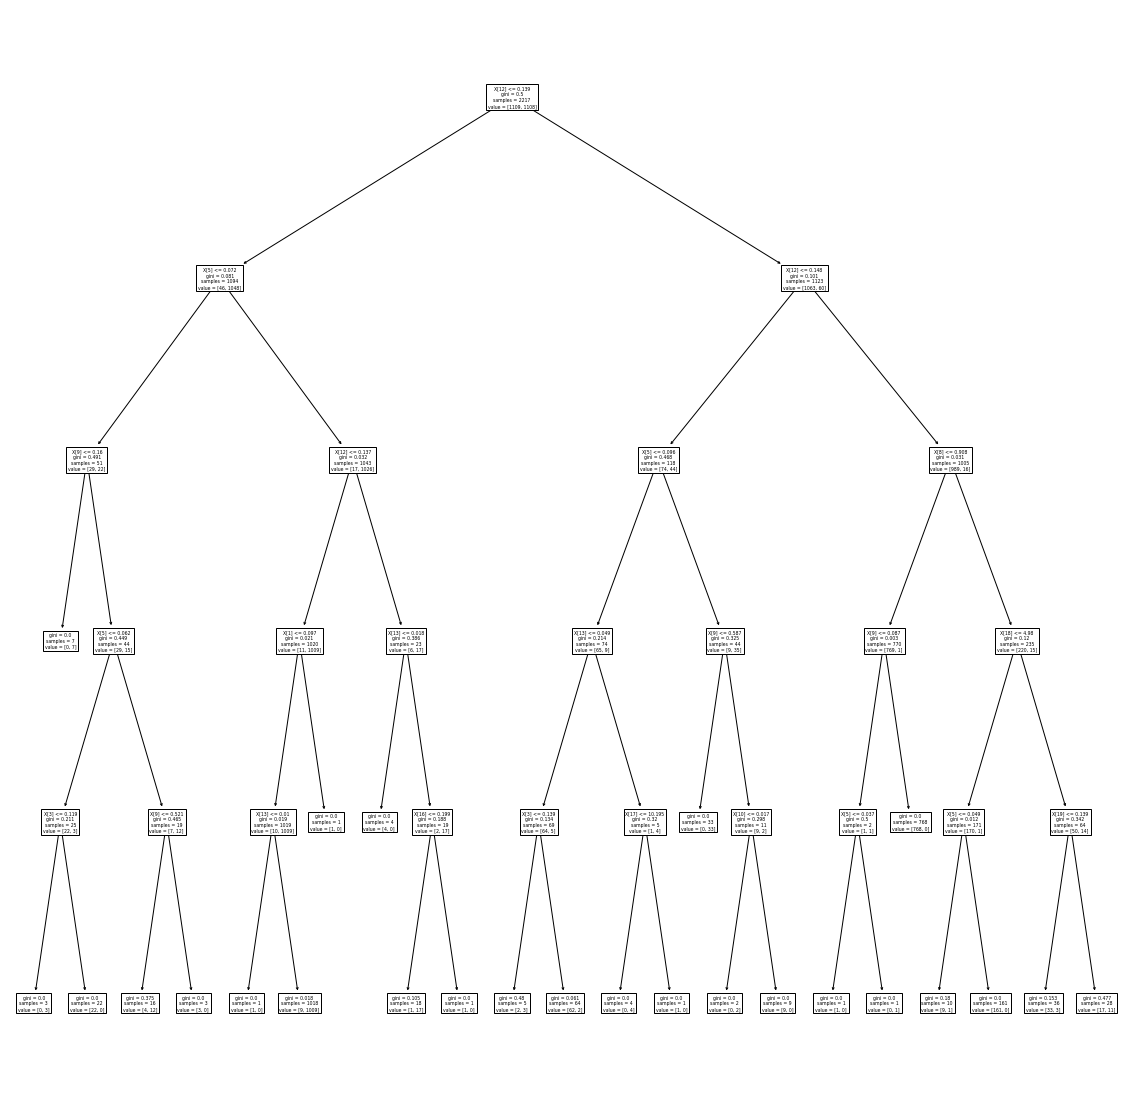

In [83]:
plt.figure(figsize = (20, 20))
plot_tree(DT)
plt.show()

### Bagging

Para a seleção dos hiperparâmetros 'base_estimator__max_depth', 'base_estimator__criterion' e 'max_samples' foi utilizada validação cruzada. Foram testados 4 valores diferentes para 'base_estimator__max_depth', 2 valores para 'base_estimator__criterion' e 6 valores para 'max_samples' em 5 grupos (5-fold cross-validation), totalizando 240 ajustes. O melhor parâmetro de regularização 'base_estimator__max_depth' apontado por esse método de seleção foi 15, 'base_estimator__criterion' igual a 'entropy' e 'max_samples' igual a 0.8.

Obtivemos aproximadamente 97% de precisão na classificação, com 3% de casos em que identificamos a voz masculina como feminina (falso negativo) e 2% de casos em que identificamos a voz feminina como masculina (falso positivo).

In [84]:
# https://stackoverflow.com/questions/47570307/tuning-parameters-of-the-classifier-used-by-baggingclassifier

param_BAG = [{'base_estimator__max_depth': [7, 10, 13, 15], 
              'base_estimator__criterion': ['gini', 'entropy'], 
              'max_samples' : [0.05, 0.1, 0.2, 0.5, 0.8, 1]}]

BAG_CV = GridSearchCV(BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_jobs = -1), 
                      param_grid = param_BAG, cv = 5, scoring = 'accuracy', verbose = 4, n_jobs = -1)

BAG_CV.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'base_estimator__criterion': ['gini', 'entropy'],
                          'base_estimator__max_depth': [7, 10, 13, 15],
                          'max_samples': [0.05, 0.1, 0.2, 0.5, 0.8, 1]}],
             scoring='accuracy', verbose=4)

In [85]:
pd.DataFrame(BAG_CV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__criterion,param_base_estimator__max_depth,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.113632,0.022135,0.016833,0.003465,gini,7,0.05,"{'base_estimator__criterion': 'gini', 'base_es...",0.952703,0.972973,0.961625,0.930023,0.963883,0.956241,0.014610,38
1,0.067239,0.004115,0.019918,0.002903,gini,7,0.1,"{'base_estimator__criterion': 'gini', 'base_es...",0.954955,0.972973,0.975169,0.948081,0.972912,0.964818,0.011105,23
2,0.070987,0.004445,0.021431,0.005548,gini,7,0.2,"{'base_estimator__criterion': 'gini', 'base_es...",0.952703,0.975225,0.981941,0.952596,0.968397,0.966172,0.011843,20
3,0.122555,0.027102,0.019964,0.004554,gini,7,0.5,"{'base_estimator__criterion': 'gini', 'base_es...",0.959459,0.961712,0.984199,0.963883,0.975169,0.968884,0.009374,11
4,0.142697,0.035109,0.021964,0.014328,gini,7,0.8,"{'base_estimator__criterion': 'gini', 'base_es...",0.950450,0.972973,0.986456,0.968397,0.970655,0.969786,0.011529,6
5,0.056988,0.014928,0.017810,0.004846,gini,7,1,"{'base_estimator__criterion': 'gini', 'base_es...",0.500000,0.500000,0.498871,0.501129,0.501129,0.500226,0.000845,42
6,0.051799,0.003122,0.017958,0.001967,gini,10,0.05,"{'base_estimator__criterion': 'gini', 'base_es...",0.950450,0.961712,0.979684,0.927765,0.957111,0.955344,0.016856,39
7,0.063719,0.008535,0.023797,0.004967,gini,10,0.1,"{'base_estimator__criterion': 'gini', 'base_es...",0.957207,0.963964,0.968397,0.943567,0.963883,0.959404,0.008688,34
8,0.066671,0.011615,0.029035,0.009741,gini,10,0.2,"{'base_estimator__criterion': 'gini', 'base_es...",0.950450,0.961712,0.986456,0.959368,0.972912,0.966180,0.012411,18
9,0.099766,0.015993,0.032985,0.014534,gini,10,0.5,"{'base_estimator__criterion': 'gini', 'base_es...",0.961712,0.961712,0.988713,0.966140,0.977427,0.971141,0.010499,2


In [86]:
BAG_CV.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 15,
 'max_samples': 0.8}

In [87]:
print(metrics.confusion_matrix(y_test, BAG_CV.predict(X_test)))
print(metrics.accuracy_score(y_test, BAG_CV.predict(X_test)))
print(metrics.f1_score(y_test, BAG_CV.predict(X_test)))

#plot_clf(BAG_CV, X_train, y_train, plot_test = True, X_test = X_test, y_test = y_test)

[[466   9]
 [ 13 463]]
0.9768664563617245
0.9767932489451476


In [100]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
# https://en.wikipedia.org/wiki/Bootstrap_aggregating

BAG = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 15, criterion = 'entropy'), n_estimators = 100, max_samples= 0.8)
BAG.fit(X_train, y_train)

BAG_pred = BAG.predict(X_test)

print(metrics.confusion_matrix(y_test, BAG_pred))
print('Acurácia:', metrics.accuracy_score(y_test, BAG.predict(X_test)))
print('F1:', metrics.f1_score(y_test, BAG.predict(X_test)))

#plot_clf(BAG, X_train, y_train, plot_test = True, X_test = X_test, y_test = y_test)

[[465  10]
 [  9 467]]
Acurácia: 0.9800210304942166
F1: 0.9800629590766002


Score :  0.9671764817278893
Bagging Accuracy:  0.9800210304942166


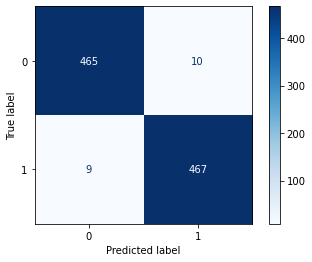

In [101]:
#Decision Tree
CM = confusion_matrix(y_test, BAG_pred)
acc_bag = accuracy_score(y_test, BAG_pred)
#score = LDA.score(X_test, y_test)
score_bag = cross_val_score(BAG, X, y, cv=5) # cross-validation
results.append(acc_bag)

print("Score : ", score_bag.mean())
print("Bagging Accuracy: ", acc_bag)

plot_confusion_matrix(BAG, X_test, y_test, cmap= "Blues")  
plt.show()

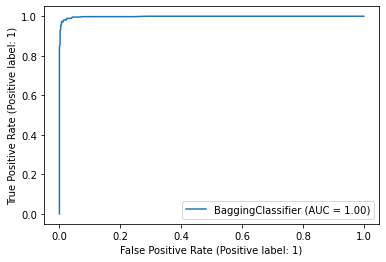

In [103]:
metrics.plot_roc_curve(BAG, X_test, y_test)

In [104]:
target_names = ['0','1']
print(classification_report(y_test,BAG_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       475
           1       0.98      0.98      0.98       476

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



## Comparando

O modelo que apresentou a melhor acurácia foi o SVM radial+StandardScaler com 98.2%, sendo marginalmente melhor que o SVM com kernel linear e Bagging. Além disso apresentou score f1 de aproximadamente 0.95.

O plot de comparação entre a curva ROC de cada modelo mostra algumas características interessantes. Com exceção do KNN, a maioria dos classificadores têm AUC igual ou muito próxima a 1.

In [105]:
print("SVM linear accuracy: ", acc_svm_l)

print("SVM radial accuracy: ",acc_svm_rbf)

print("SVM radial+StandardScaler accuracy: ",acc_svm_rbf_s)

print("KNN accuracy: ", acc_knn)

print("Decision Tree accuracy: ",acc_dt)

print("Bagging accuracy: ",acc_bag)

SVM linear accuracy:  0.9810725552050473
SVM radial accuracy:  0.9705573080967402
SVM radial+StandardScaler accuracy:  0.982124079915878
KNN accuracy:  0.7760252365930599
Decision Tree accuracy:  0.9726603575184016
Bagging accuracy:  0.9800210304942166


In [106]:
print("SVM linear f1 score: ", score_svm_l.mean())

print("SVM radial f1 score: ",score_svm_rbf.mean())

print("SVM radial+StandardScaler f1 score: ",score_svm_rbf_s.mean())

print("KNN f1 score: ", score_knn.mean())

print("Decision Tree f1 score: ",score_dt.mean())

print("Bagging f1 score: ",score_bag.mean())

SVM linear f1 score:  0.9646538191277827
SVM radial f1 score:  0.9542377442552363
SVM radial+StandardScaler f1 score:  0.9542302689610838
KNN f1 score:  0.7477855686954615
Decision Tree f1 score:  0.9596005202804729
Bagging f1 score:  0.9671764817278893


In [109]:
print(cross_val_score(SVM_L, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(svm_rbf, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(svm_rbf_s, X_s, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(KNN, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(DT, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(BAG, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

0.9646948166491587
0.9543866309930286
0.9545245261576284
0.7599716018627346
0.959289128867144
0.9685244057787952


<Figure size 720x576 with 0 Axes>

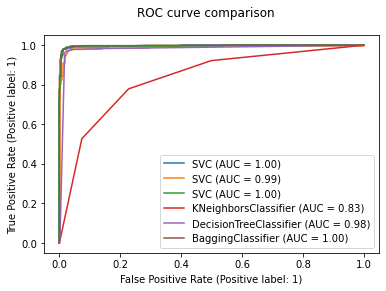

In [108]:
plt.figure(figsize=(10,8))

fig1 = metrics.plot_roc_curve(SVM_L, X_test, y_test)

fig2 = metrics.plot_roc_curve(svm_rbf, X_test, y_test,ax=fig1.ax_)
fig2.figure_.suptitle("ROC curve comparison")

fig3 = metrics.plot_roc_curve(svm_rbf_s, X_test_s, y_test,ax=fig1.ax_)
fig3.figure_.suptitle("ROC curve comparison")

fig4 = metrics.plot_roc_curve(KNN, X_test, y_test,ax=fig1.ax_)
fig4.figure_.suptitle("ROC curve comparison")

fig5 = metrics.plot_roc_curve(DT, X_test, y_test,ax=fig1.ax_)
fig5.figure_.suptitle("ROC curve comparison")

fig6 = metrics.plot_roc_curve(BAG, X_test, y_test,ax=fig1.ax_)
fig6.figure_.suptitle("ROC curve comparison")

plt.legend(loc=0)

## Conclusão

A análise exploratória dos dados de voz mostrou que as variáveis 'Q25', 'IQR' e 'meanfun' são as que distinguem melhor entre as vozes masculinas e femininas. Ao observarmos os histogramas podemos ver que essas variáveis apresentam médias mais distintas e a massa de dados menos coincidente em cada uma das curvas. A matriz de correlação mostra que essas variáveis também são as que possuem a maior correlação absoluta com as categorias de interesse. Talvez fosse interessante selecionar e testar essas variáveis em um modelo mais parcimonioso, a fim de melhorar a velocidade de processamento.

Ao analizarmos os seis classificadores observamos bons resultados para a maioria deles. Com excessão do K-nearest neighbours com precisão 77% , todos os outros apresentaram precisões e score f1 a cima de 95%, indicando que todos poderiam ser usados para classficação do tipo de voz sem muita diferença. A curva ROC também apresentou desempenho semelhante, apontando apenas o KNN como ruim.

Finalmente, o modelo escolhido como melhor em termos de acurácia para classificação do tipo de voz foi o SVM com kernel radial + StandardScaler, mas apenas com uma diferença marginal para o Bagging e o SVM com kernel linear.

### "Nota-se que treinar SVM com kernel RBF é significativamente mais rápido do que com o kernel linear. Tente explicar o motivo para tal, fazendo buscas na Internet se necessário".

A maioria das informações sobre o desempenho do svm nas comunidades de data science comentam apenas a cerca da complexidade dos cálculos realizados, apontados como de ordem O(n_samples^2 * n_features). Quando se busca por infomações sobre o desempenho específico do SVC(kernel='linear'), muitos comentarios (inclusive na própria página do scikit-learn) recomendam utilizar o sklearn.svm.LinearSVC como substituto por ser extremamente mais rápido, mas não comentam o contraste entre a velocidade de processamente dos diferentes kernels.

Referências:
https://scikit-learn.org/stable/modules/svm.html#complexity
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
https://stackoverflow.com/questions/40077432/why-is-scikit-learn-svm-svc-extremely-slow
https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution
https://www.csie.ntu.edu.tw/~cjlin/liblinear/
https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f

## Apêndice: Testando classificadores utilizando apenas as variáveis com correlação superior a 0.5

In [7]:
voice2 = voice[[ 'Q25', 'IQR', 'meanfun', 'label']].copy()

In [8]:
X2 = voice2.drop(columns = ['label'])
y2 = voice2['label']
results = []

In [9]:
test_size = 0.3
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,stratify = y2, test_size = test_size)

Quando apenas as variáveis com alta correlação são usada, o ajuste do KNN se torna muito melhor que o ajuste feito anteriormente. Os outros classificadores continuam tendo precisões semelhantes.

In [77]:
param_KNN2 = [{'n_neighbors': [1, 3, 5, 10, 15, 20], 
              'p': [1, 2, 3, 4]}]

KNN2_CV = GridSearchCV(KNeighborsClassifier(), param_grid = param_KNN2, cv = 5, 
                      scoring = 'accuracy', verbose = 4, n_jobs = -1)

KNN2_CV.fit(X2_train, y2_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5, 10, 15, 20],
                          'p': [1, 2, 3, 4]}],
             scoring='accuracy', verbose=4)

In [78]:
KNN2_CV.best_params_

{'n_neighbors': 10, 'p': 3}

In [58]:
print(metrics.confusion_matrix(y2_test, KNN2.predict(X2_test)))

[[459  17]
 [ 20 455]]


In [79]:
KNN2 = KNeighborsClassifier(n_neighbors = 10, p = 3, n_jobs = -1)
KNN2.fit(X2_train, y2_train)

print('Acurácia:', metrics.accuracy_score(y2_test, KNN2.predict(X2_test)))
print('F1:', metrics.f1_score(y2_test, KNN2.predict(X2_test)))

Acurácia: 0.961093585699264
F1: 0.9609292502639916


In [167]:
DT2 = DecisionTreeClassifier(max_depth = 13, criterion = 'entropy',splitter='best')
DT2.fit(X2_train, y2_train)

DT2_pred = DT2.predict(X2_test)

print(metrics.confusion_matrix(y2_test,DT2_pred))
print(metrics.accuracy_score(y2_test, DT2_pred))
print(metrics.f1_score(y2_test, DT2_pred))

[[454  22]
 [ 16 459]]
0.9600420609884333
0.9602510460251045


In [169]:
param_BAG2 = [{'base_estimator__max_depth': [7, 10, 13, 15], 
              'base_estimator__criterion': ['gini', 'entropy'], 
              'max_samples' : [0.05, 0.1, 0.2, 0.5, 0.8, 1]}]

BAG2_CV = GridSearchCV(BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_jobs = -1), 
                      param_grid = param_BAG2, cv = 5, scoring = 'accuracy', verbose = 4, n_jobs = -1)

BAG2_CV.fit(X2_train, y2_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'base_estimator__criterion': ['gini', 'entropy'],
                          'base_estimator__max_depth': [7, 10, 13, 15],
                          'max_samples': [0.05, 0.1, 0.2, 0.5, 0.8, 1]}],
             scoring='accuracy', verbose=4)

In [189]:
BAG2_CV.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 15,
 'max_samples': 0.2}

In [190]:
BAG2 = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 15, criterion = 'entropy'), n_estimators = 100, max_samples= 0.2)
BAG2.fit(X2_train, y2_train)

BAG2_pred = BAG2.predict(X2_test)

print(metrics.confusion_matrix(y2_test, BAG2_pred))
print('Acurácia:', metrics.accuracy_score(y2_test, BAG2.predict(X2_test)))
print('F1:', metrics.f1_score(y2_test, BAG2.predict(X2_test)))

[[460  16]
 [ 10 465]]
Acurácia: 0.9726603575184016
F1: 0.9728033472803348


In [10]:
def plot_clf(clf, X, y, h=0.02, pad=0.25, plot_test = False, X_test = None, y_test = None):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if plot_test == False:
        plt.figure(figsize = (6, 6))
        
        plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xlabel('X1')
        plt.ylabel('X2')
    else:
        plt.figure(figsize = (14, 6))
        
        plt.subplot(1, 2, 1)
        plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xlabel('X1')
        plt.ylabel('X2')
        
        plt.subplot(1, 2, 2)
        plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xlabel('X1')
        plt.ylabel('X2')

    plt.show()